In [1]:
import tensorflow as tf
import os, shutil
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
!ls

666.jpg			  Untitled.ipynb	   mnistTF.ipynb
Conv_Net_Dogs_Cats.ipynb  Untitled1.ipynb	   mnistTF.model
Dogs_and_Cats_Data.ipynb  X_train.pickle	   requirements.txt
Junk			  cats_and_dogs_small.old  y_train.pickle
PetImages		  core


In [3]:
!mkdir cats_and_dogs_small

In [4]:
!ls

666.jpg			  Untitled.ipynb	   core
Conv_Net_Dogs_Cats.ipynb  Untitled1.ipynb	   mnistTF.ipynb
Dogs_and_Cats_Data.ipynb  X_train.pickle	   mnistTF.model
Junk			  cats_and_dogs_small	   requirements.txt
PetImages		  cats_and_dogs_small.old  y_train.pickle


In [5]:
source_cats = 'PetImages/Cat'
source_dogs = 'PetImages/Dog'

base_dir = 'cats_and_dogs_small'

In [6]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [7]:
!ls cats_and_dogs_small/

test  train  validation


In [8]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [9]:
!ls cats_and_dogs_small/train

cats  dogs


In [10]:
!ls cats_and_dogs_small/validation

cats  dogs


In [11]:
!ls cats_and_dogs_small/test

cats  dogs


In [12]:
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(source_cats, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(source_cats, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)  
    
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(source_cats, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)  
    
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(source_dogs, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(source_dogs, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)  
    
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(source_dogs, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)  

In [13]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total test cat images: ', len(os.listdir(test_cats_dir)))

print('total training dog images: ', len(os.listdir(train_dogs_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('total test dog images: ', len(os.listdir(test_dogs_dir)))

total training cat images:  1000
total validation cat images:  500
total test cat images:  500
total training dog images:  1000
total validation dog images:  500
total test dog images:  500


In [14]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [17]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape (20,)


In [20]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 13s 129ms/step - loss: 0.6931 - acc: 0.5305 - val_loss: 0.6829 - val_acc: 0.5640
Epoch 2/30
100/100 [==============================] - 12s 117ms/step - loss: 0.6649 - acc: 0.6085 - val_loss: 0.6449 - val_acc: 0.6400
Epoch 3/30
100/100 [==============================] - 12s 116ms/step - loss: 0.6116 - acc: 0.6685 - val_loss: 0.6297 - val_acc: 0.6330
Epoch 4/30
100/100 [==============================] - 12s 116ms/step - loss: 0.5700 - acc: 0.7065 - val_loss: 0.5881 - val_acc: 0.6840
Epoch 5/30
100/100 [==============================] - 12s 116ms/step - loss: 0.5367 - acc: 0.7280 - val_loss: 0.5747 - val_acc: 0.6920
Epoch 6/30
100/100 [==============================] - 12s 116ms/step - loss: 0.5041 - acc: 0.7550 - val_loss: 0.7234 - val_acc: 0.6200
Epoch 7/30
100/100 [==============================] - 12s 116ms/step - loss: 0.4789 - acc: 0.7690 - val_loss: 0.5737 - val_acc: 0.6990
Epoch 8/30
100/100 [==============================] - 1

In [21]:
model.save('cats_and_dogs_small.h5')

In [22]:
# lets see if we can get some data feedback 
model_keys = history.history.keys()
print(model_keys)

dict_keys(['acc', 'val_acc', 'loss', 'val_loss'])


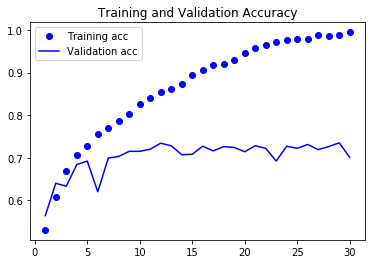

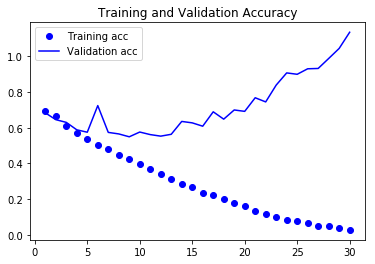

<Figure size 432x288 with 0 Axes>

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and Validation Accuracy")

plt.legend()
plt.figure()


plt.plot(epochs, loss, 'bo', label='Training acc')
plt.plot(epochs, val_loss, 'b', label='Validation acc')
plt.title("Training and Validation Accuracy")

plt.legend()
plt.figure()

plt.show()

In [24]:
# These plots are very characteristic of overfitting
# Let's fix this using data augmentation
# this is just an example we wont actually be using datagen

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

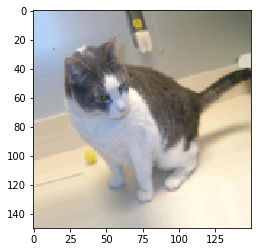

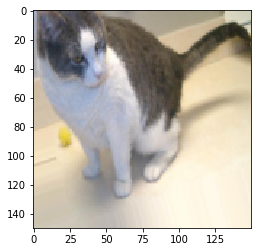

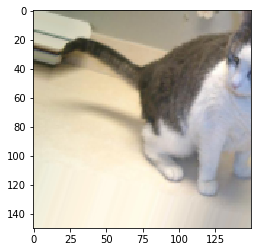

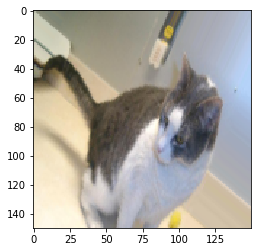

In [25]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for 
         fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()
    

In [27]:
# We will also be using dropout to further increase generalization

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [35]:

# our new generator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    rescale=1./255)                                           # notice we won't be augmenting our testing data

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [36]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 29s 289ms/step - loss: 0.6915 - acc: 0.5187 - val_loss: 0.6794 - val_acc: 0.5108
Epoch 2/100
100/100 [==============================] - 26s 264ms/step - loss: 0.6762 - acc: 0.5650 - val_loss: 0.6532 - val_acc: 0.6018
Epoch 3/100
100/100 [==============================] - 26s 263ms/step - loss: 0.6633 - acc: 0.5859 - val_loss: 0.6374 - val_acc: 0.6180
Epoch 4/100
100/100 [==============================] - 27s 270ms/step - loss: 0.6516 - acc: 0.5950 - val_loss: 0.6259 - val_acc: 0.6340
Epoch 5/100
100/100 [==============================] - 26s 265ms/step - loss: 0.6376 - acc: 0.6119 - val_loss: 0.6294 - val_acc: 0.6193
Epoch 6/100
100/100 [==============================] - 29s 291ms/step - loss: 0.6150 - acc: 0.6628 - val_loss: 0.5673 - val_acc: 0.6965
Epoch 7/100
100/100 [==============================] - 27s 267ms/step - loss: 0.6089 - acc: 0.6588 - val_loss: 0.5693 - val_acc: 0.6973
Epoch 8/100
100/100 [===========================

In [37]:
model.save('cats_and_dogs_small_2.h5')